In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [ ]:
# os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'winequality-white.csv',
 'auto.csv']

In [ ]:
dataset = pd.read_csv('iris.csv')

In [ ]:
feature = dataset.drop(['Id', 'Species'], axis=1) #id dan species tidak dibutuhkan
label = dataset['Species'] #target prediksi

In [ ]:
scaler = preprocessing.StandardScaler()

feature_scaled = scaler.fit_transform(feature.values) 

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.2, random_state=10)

In [ ]:
estimator = [50, 100, 200]
def random_forest_test(est_value):
  random_forest = RandomForestClassifier(n_estimators=est_value, bootstrap=True, max_features = "sqrt")
  random_forest.fit(feature_train, label_train)

  predictions = random_forest.predict(feature_train)

  print("prediksi menggunakan training set")
  print("f1 score")
  print(f1_score(label_train, predictions, average='macro'))
  print("precision score")
  print(precision_score(label_train, predictions, average='macro'))
  print("recall score")
  print(recall_score(label_train, predictions, average='macro'))

  predictions = random_forest.predict(feature_test)

  print("\nprediksi menggunakan testing set")
  print("f1 score")
  print(f1_score(label_test, predictions, average='macro'))
  print("precision score")
  print(precision_score(label_test, predictions, average='macro'))
  print("recall score")
  print(recall_score(label_test, predictions, average='macro'))

In [ ]:
for i in estimator:
  print("Nilai (k) sekarang adalah :", i)
  random_forest_test(i)
  print('\n')

Nilai (k) sekarang adalah : 50
prediksi menggunakan training set
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
f1 score
0.9644444444444445
precision score
0.9583333333333334
recall score
0.9743589743589745


Nilai (k) sekarang adalah : 100
prediksi menggunakan training set
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
f1 score
0.9644444444444445
precision score
0.9583333333333334
recall score
0.9743589743589745


Nilai (k) sekarang adalah : 200
prediksi menggunakan training set
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
f1 score
0.9644444444444445
precision score
0.9583333333333334
recall score
0.9743589743589745




Hasil f1_score yang didapatkan untuk masing2 nilai estimator relatif sama yaitu 0.9644444444444445

In [ ]:
vkernel = ['poly', 'linear']
def svm_class_test(kernel_test):
  svm_classifier = SVC(kernel=kernel_test)
  svm_classifier.fit(feature_train, label_train)


  predictions = svm_classifier.predict(feature_train)

  print("prediksi menggunakan training set")
  print("f1 score")
  print(f1_score(label_train, predictions, average='macro'))
  print("precision score")
  print(precision_score(label_train, predictions, average='macro'))
  print("recall score")
  print(recall_score(label_train, predictions, average='macro'))

  predictions = svm_classifier.predict(feature_test)

  print("\nprediksi menggunakan testing set")
  print("f1 score")
  print(f1_score(label_test, predictions, average='macro'))
  print("precision score")
  print(precision_score(label_test, predictions, average='macro'))
  print("recall score")
  print(recall_score(label_test, predictions, average='macro'))

In [ ]:
for i in vkernel:
  print("Jenis Kernel yang digunakan : ", i)
  svm_class_test(i)
  print('\n')


Jenis Kernel yang digunakan :  poly
prediksi menggunakan training set
f1 score
0.9333333333333332
precision score
0.9367274250995182
recall score
0.9367274250995181

prediksi menggunakan testing set
f1 score
0.9620132953466287
precision score
0.9761904761904763
recall score
0.9523809523809524


Jenis Kernel yang digunakan :  linear
prediksi menggunakan training set
f1 score
0.9661375661375661
precision score
0.9716312056737588
recall score
0.963963963963964

prediksi menggunakan testing set
f1 score
0.9644444444444445
precision score
0.9583333333333334
recall score
0.9743589743589745




In [ ]:
#Linear SVC
linearsvc_classifier = LinearSVC()
linearsvc_classifier.fit(feature_train, label_train)

prediction = linearsvc_classifier.predict(feature_test)

print(f1_score(label_test, prediction, average='macro'))
print(precision_score(label_test, prediction, average='macro'))
print(recall_score(label_test, prediction, average='macro'))

# feature_test, label_test = make_classification(n_features=4, random_state=0)
# clf = make_pipeline(scaler, LinearSVC(random_state=0, tol=1e-5))
# clf.fit(feature_test, label_test)
# print(clf.named_steps['linearsvc'].coef_)

# print(clf.named_steps['linearsvc'].intercept_)

# print(clf.predict([[0, 0, 0, 0]]))

0.9644444444444445
0.9583333333333334
0.9743589743589745


Untuk Algoritma SVM dari 2 kernel yang di pakai, hasil f1_score yang didapatkan tidak jauh berbeda, untuk kernel polynomial : 0.9620132953466287, sedangkan untuk kernel linear dan LinearSVC bernilai sama : 0.9644444444444445.

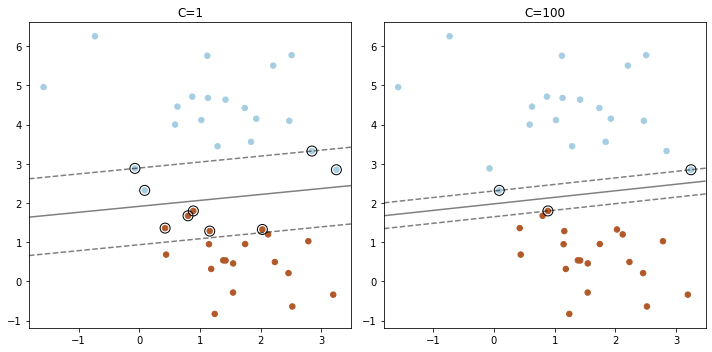

In [ ]:
X = feature_test
y = label_test
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

In [ ]:
test_value = [1, 3, 5, 7, 9, 11, 13, 15]
def knn_test(k_value):
  knn = KNeighborsClassifier(k_value)
  knn.fit(feature_train, label_train)

  predictions = knn.predict(feature_train)

  print("prediksi menggunakan training set")
  print("f1 score")
  print(f1_score(label_train, predictions, average='macro'))
  print("precision score")
  print(precision_score(label_train, predictions, average='macro'))
  print("recall score")
  print(recall_score(label_train, predictions, average='macro'))

  predictions = knn.predict(feature_test)

  print("\nprediksi menggunakan testing set")
  print("f1 score")
  print(f1_score(label_test, predictions, average='macro'))
  print("precision score")
  print(precision_score(label_test, predictions, average='macro'))
  print("recall score")
  print(recall_score(label_test, predictions, average='macro'))

In [ ]:
for k in test_value:
  print("Nilai (k) sekarang adalah :", k)
  knn_test(k)
  print('\n')

Nilai (k) sekarang adalah : 1
prediksi menggunakan training set
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
f1 score
0.9644444444444445
precision score
0.9583333333333334
recall score
0.9743589743589745


Nilai (k) sekarang adalah : 3
prediksi menggunakan training set
f1 score
0.9581699346405227
precision score
0.9578111946532998
recall score
0.9587261680284936

prediksi menggunakan testing set
f1 score
0.9644444444444445
precision score
0.9583333333333334
recall score
0.9743589743589745


Nilai (k) sekarang adalah : 5
prediksi menggunakan training set
f1 score
0.9580118616490841
precision score
0.9587542087542088
recall score
0.9574690970039806

prediksi menggunakan testing set
f1 score
0.9644444444444445
precision score
0.9583333333333334
recall score
0.9743589743589745


Nilai (k) sekarang adalah : 7
prediksi menggunakan training set
f1 score
0.9664781060129898
precision score
0.9664781060129898
recall score
0.9664781060129898

prediksi menggu

untuk K-NN nilai f1_score yang didapatkan dari tiap2 nilai k nya juga hampir / relatif sama
